In [20]:
import os
cwd=os.getcwd()
print(cwd)

C:\Users\HP\OneDrive\wycliffe\Africa Data School\Assignments\Clustering


In [56]:
#import all the libraries we will need 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
#read in the data that we will use in the analysis
df = pd.read_csv("C:/Users/HP/OneDrive/wycliffe/Africa Data School/Assignments/Clustering/KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


Description of the variable as provided by Kaggle

 1. ad_id: an unique ID for each ad.

 2. xyzcampaignid: an ID associated with each ad campaign of XYZ company.

 3. fbcampaignid: an ID associated with how Facebook tracks each campaign.

 4. age: age of the person to whom the ad is shown.

 5. gender: gender of the person to whim the add is shown

 6. interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s  Facebook public profile).

 7. Impressions: the number of times the ad was shown.

 8. Clicks: number of clicks on for that ad.

 9. Spent: Amount paid by company xyz to Facebook, to show that ad.

 10. Total conversion: Total number of people who enquired about the product after seeing the ad.

 11. Approved conversion: Total number of people who bought the product after seeing the ad.

In [31]:
#check the data type of each column
# we have two categorical features i.e. age and gender
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [32]:
#Although the xyz_campaign_id has been show as an integer we classify it as categorical since it takes three distint values
print(df.xyz_campaign_id.unique())

[ 916  936 1178]


In [33]:
df_c = df.copy()
df_c.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [34]:
categories = ['ad_id','fb_campaign_id','age', 'gender', 'xyz_campaign_id', 'interest']
df_c[categories] = df_c[categories].astype('category')
df_c.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [37]:
#Focus on now on encoding the categorical features but we have first to drop the columns of the other  data types
#we first isolate the data to focus on the categorical variables only
#although the ad_id and fb_campaign_id can be regarded as categorical we will ignore them here since they are entirely unique values. 
categorical_data = df.drop(['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','ad_id','fb_campaign_id'], axis=1)
categorical_data.head()

,xyz_campaign_id,age,gender,interest
0,916,30-34,M,15
1,916,30-34,M,16
2,916,30-34,M,20
3,916,30-34,M,28
4,916,30-34,M,28


In [38]:
#we now encode the categorical variables
encoded_xyz_campaign_id = pd.get_dummies(categorical_data['xyz_campaign_id'])
encoded_age = pd.get_dummies(categorical_data['age'])
encoded_gender = pd.get_dummies(categorical_data['gender'])
encoded_interest = pd.get_dummies(categorical_data['interest'])

In [39]:
#we now join the encoded data to the subset dataframe containing the categorical variables
categorical_data = categorical_data.join(encoded_xyz_campaign_id)
categorical_data = categorical_data.join(encoded_age)
categorical_data = categorical_data.join(encoded_gender)
categorical_data = categorical_data.join(encoded_interest)
categorical_data.head()

,xyz_campaign_id,age,gender,interest,916,936,1178,30-34,35-39,40-44,...,105,106,107,108,109,110,111,112,113,114
0,916,30-34,M,15,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,916,30-34,M,16,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,916,30-34,M,20,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,916,30-34,M,28,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,916,30-34,M,28,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


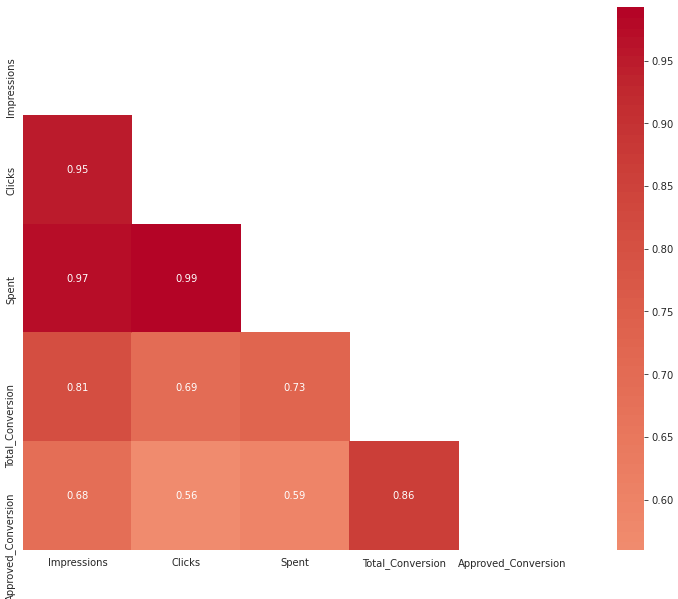

In [13]:
#we drop the first four columns since they are categorical variables and correlation can't be computed for such data types.
#heatmap_data = categorical_data.drop(['xyz_campaign_id','age','gender','interest'], axis=1)
#sns.heatmap(heatmap_data.corr(),annot=True,cmap="YlGnBu")
# Correlation matrix heatmap
corr = df_c.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, square=True)

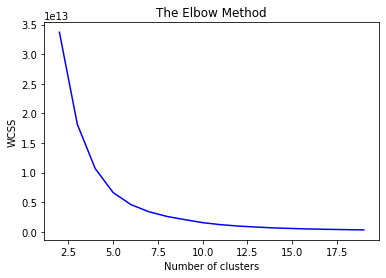

In [40]:
#our target feature is total conversion
#we will try to predict total conversion using 'impressions','clicks' and 'spent'
x=df.iloc[:, [6, 8]].values
x[0:5]
#First we import the KMeans algorithm contain in the sklearn package
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 20), wcss, c = 'blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the elbow diagram above,it shows that we have to use three clusters i.e. K=3

In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x)

In [50]:
print(y_means)

[1 1 1 ... 1 0 0]


In [51]:
df['Advert_Type'] = y_means
df.head()
df.tail()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Advert_Type
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,1
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0
1142,1314415,1178,179982,45-49,F,114,513161,114,165.609999,5,2,0


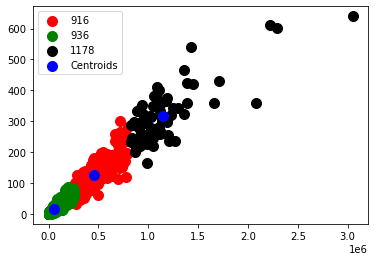

In [52]:
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = '916')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'green', label = '936')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'black', label = '1178')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'blue', label = 'Centroids')

plt.legend()

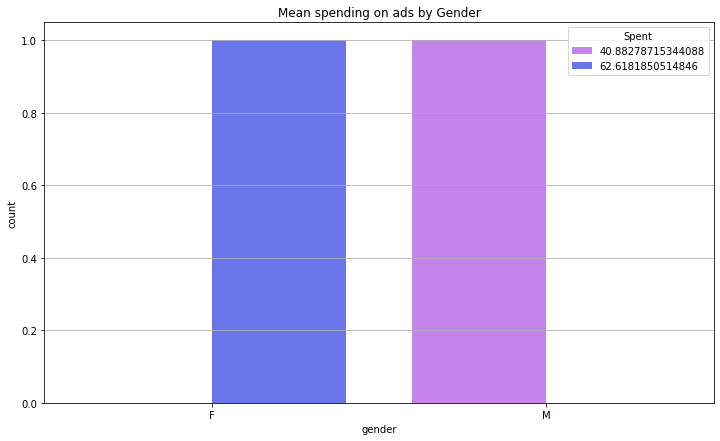

In [72]:
#visualizing ad spending vs gender
avg_spending_gender = df_c.groupby('gender')['Spent'].mean().sort_values().reset_index()

#plot
fig=plt.figure(figsize=(12,7))

sns.countplot(data=avg_spending_gender, x='gender', hue='Spent', palette=['#C873FB', '#5663FF'])
plt.title('Mean spending on ads by Gender')
plt.grid(axis='y')

<AxesSubplot:xlabel='gender', ylabel='Spent'>

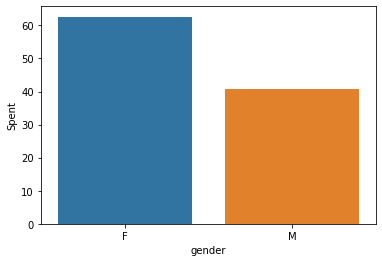

In [73]:
sns.barplot(x="gender", y='Spent', data=avg_spending_gender)

In [74]:
#visualizing sales vs Advert type vs age
px.scatter_3d(data_frame=df, x='age', y='Approved_Conversion', z='Advert_Type', color='Advert_Type', color_continuous_scale=['#FF0000', '#00FF00', '#000080'])

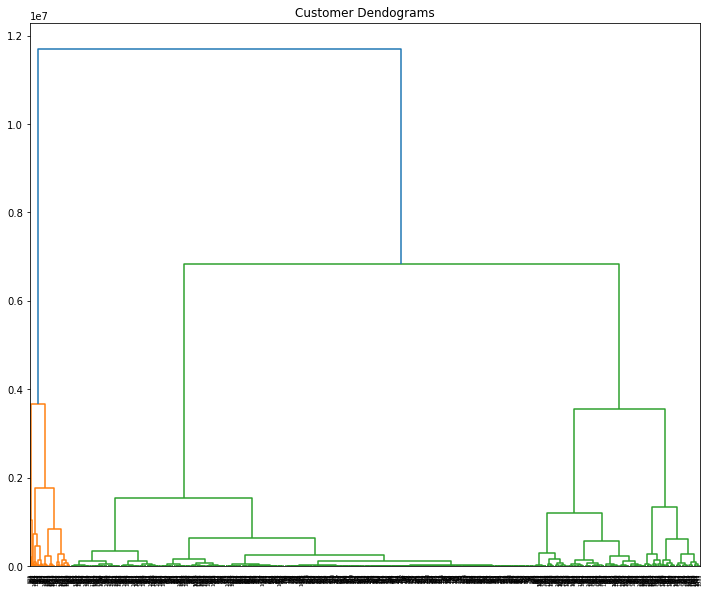

In [76]:
#using hierarchical clustering
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 10))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(x, method='ward'))